In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput
import PIL
import PIL.Image
import tensorflow_datasets as tfds

In [3]:
%cd /content/drive/MyDrive/EmbeddedAIProject /data_iow

/content/drive/.shortcut-targets-by-id/14Ob3vUJBCIMmuYZd4WatyOaPDhcD5Ykt/Embedded AI Project /data_iow


In [4]:
%cd /content/drive/MyDrive/EmbeddedAIProject /data_iow/CombinedData

/content/drive/.shortcut-targets-by-id/14Ob3vUJBCIMmuYZd4WatyOaPDhcD5Ykt/Embedded AI Project /data_iow/CombinedData


In [5]:
data = np.load('data.npy')

In [6]:
labels = np.load('labels.npy')

In [7]:
np.unique(labels)

array([0, 1, 2, 3])

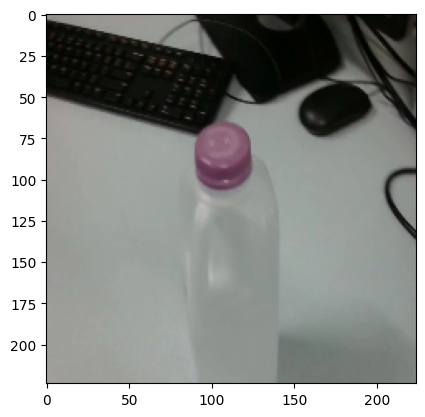

In [8]:
plt.imshow(data[1000])

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
# Split the data into train, validation, and test sets
dev_data, test_data, dev_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
train_data, val_data, train_labels, val_labels = train_test_split(dev_data, dev_labels, test_size=0.2, random_state=42, stratify=dev_labels)



# Shape of the datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (1478, 224, 224, 3)
Training labels shape: (1478,)
Validation data shape: (370, 224, 224, 3)
Validation labels shape: (370,)
Test data shape: (463, 224, 224, 3)
Test labels shape: (463,)


Function to calculate size of model

In [ ]:
#https://github.com/bhattbhavesh91/freecodecamp-tflite/blob/main/tflite-notebook.ipynb

In [10]:
def get_size(model):
  model_size = os.path.getsize(model)
  return model_size

In [11]:
def get_kb(model_size):
  return print('Model size: ' + str(round(model_size / 1024, 3)) + ' KB')

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/MobileNet

In [12]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(input_shape=(224, 224, 3),
                       include_top=False,
                       weights='imagenet',
                       pooling='avg',
                       alpha=0.25)

# Freeze the pre-trained layers of the base model
for layer in base_model.layers:
    layer.trainable = False

num_classes = 4
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(base_model.output)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)


2108140/2108140 [==============================] - 1s 0us/step


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 8)       216       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 8)      32        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 8)       0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)      72        
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 8)      32        
 ation)                                                      

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

In [15]:
history = model.fit(train_data, train_labels, epochs=40, batch_size=32, validation_data=(val_data, val_labels))

Epoch 1/40
47/47 [==============================] - 13s 64ms/step - loss: 1.5027 - accuracy: 0.3917 - val_loss: 1.3278 - val_accuracy: 0.4595
Epoch 2/40
47/47 [==============================] - 1s 29ms/step - loss: 1.3813 - accuracy: 0.4391 - val_loss: 1.2276 - val_accuracy: 0.5162
Epoch 3/40
47/47 [==============================] - 1s 26ms/step - loss: 1.2813 - accuracy: 0.4790 - val_loss: 1.1392 - val_accuracy: 0.5568
Epoch 4/40
47/47 [==============================] - 1s 24ms/step - loss: 1.1903 - accuracy: 0.5122 - val_loss: 1.0594 - val_accuracy: 0.5973
Epoch 5/40
47/47 [==============================] - 1s 26ms/step - loss: 1.1079 - accuracy: 0.5494 - val_loss: 0.9885 - val_accuracy: 0.6297
Epoch 6/40
47/47 [==============================] - 1s 24ms/step - loss: 1.0359 - accuracy: 0.5934 - val_loss: 0.9256 - val_accuracy: 0.6568
Epoch 7/40
47/47 [==============================] - 1s 26ms/step - loss: 0.9708 - accuracy: 0.6319 - val_loss: 0.8698 - val_accuracy: 0.7135
Epoch 8/40
4

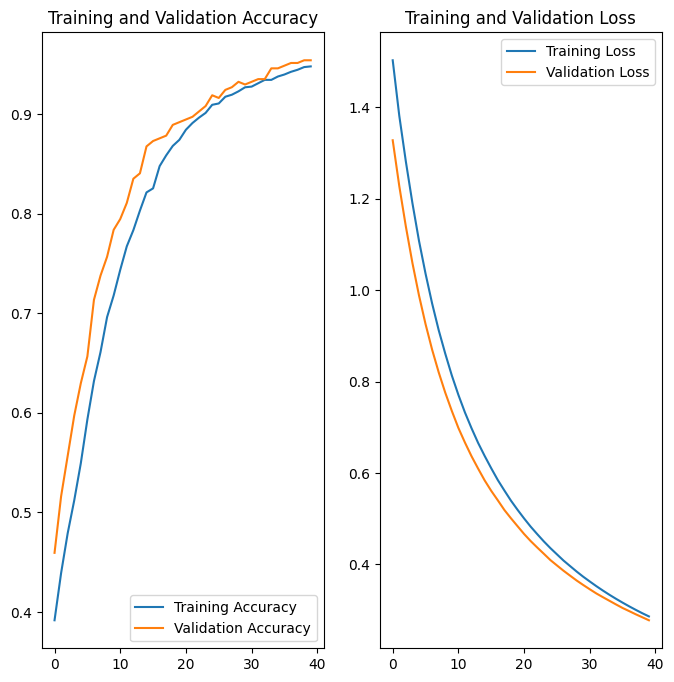

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
base_model_name = 'base_model.h5'

In [18]:
model.save(base_model_name)

In [19]:
get_kb(get_size(base_model_name))

Model size: 1123.312 KB


In [20]:
base_model_size = get_size(base_model_name)

In [21]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

15/15 [==============================] - 1s 39ms/step - loss: 0.2650 - accuracy: 0.9611
Test loss:  0.2649887204170227
Test accuracy:  0.9611231088638306


Convert the base model

In [ ]:
#https://www.tensorflow.org/lite/models/convert/convert_models
#https://www.tensorflow.org/lite/performance/post_training_integer_quant

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [23]:
tflite_model_name = "tf_lite_model.tflite"
open(tflite_model_name, "wb").write(tflite_model)

861060

In [24]:
get_kb(get_size(tflite_model_name))

Model size: 840.879 KB


In [32]:
tflite_model_size = get_size(tflite_model_name)

In [28]:
interpreter = tf.lite.Interpreter(model_path = tflite_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


In [29]:
interpreter.resize_tensor_input(input_details[0]['index'], (463, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (463, 4))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [463 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [463   4]
Output Type: <class 'numpy.float32'>


In [30]:
interpreter.set_tensor(input_details[0]['index'], test_data)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction shape: (463, 4)


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction_classes, test_labels)
print('Test Accuracy of the tflite model: ', accuracy)

Test Accuracy of the tflite model:  0.9611231101511879


In [33]:
ratio = tflite_model_size/base_model_size
ratio

0.7485707728259056

Convert to float 16

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

In [35]:
tflitefloat16_model_name = "tf_lite_float_16_model.tflite"
open(tflitefloat16_model_name, "wb").write(tflite_model)

446292

In [36]:
get_kb(get_size(tflitefloat16_model_name))

Model size: 435.832 KB


In [37]:
tflitefloat16_model_size = get_size(tflitefloat16_model_name)

In [38]:
ratio = tflitefloat16_model_size/base_model_size
ratio

0.3879882323485228

In [39]:
ratio = tflitefloat16_model_size/tflite_model_size
ratio

0.5183053445752909

In [40]:
interpreter = tf.lite.Interpreter(model_path = tflitefloat16_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


In [41]:
interpreter.resize_tensor_input(input_details[0]['index'], (463, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (463, 4))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [463 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [463   4]
Output Type: <class 'numpy.float32'>


In [42]:
interpreter.set_tensor(input_details[0]['index'], test_data)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction shape: (463, 4)


In [43]:
accuracy = accuracy_score(prediction_classes, test_labels)
print('Test Accuracy of the tflite float 16 model: ', accuracy)

Test Accuracy of the tflite float 16 model:  0.9611231101511879


Optimize for size

In [44]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [45]:
tflitequant_model_name = "tf_lite_quant_model.tflite"
open(tflitequant_model_name, "wb").write(tflite_model)

273680

In [46]:
get_kb(get_size(tflitequant_model_name))

Model size: 267.266 KB


In [47]:
tflitequant_model_size = get_size(tflitequant_model_name)

In [48]:
ratio = tflitequant_model_size/base_model_size
ratio

0.2379263339453625

In [49]:
ratio = tflitequant_model_size/ tflitefloat16_model_size
ratio

0.6132307995662033

In [50]:
interpreter = tf.lite.Interpreter(model_path = tflitequant_model_name)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


In [51]:
interpreter.resize_tensor_input(input_details[0]['index'], (463, 224, 224, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (463, 4))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [463 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [463   4]
Output Type: <class 'numpy.float32'>


In [52]:
interpreter.set_tensor(input_details[0]['index'], test_data)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction shape: (463, 4)


In [53]:
accuracy = accuracy_score(prediction_classes, test_labels)
print('Test Accuracy of the tflite quant model: ', accuracy)

Test Accuracy of the tflite quant model:  0.9611231101511879
